To predict the popularity of music I will use a dataset containing audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and its qualities.
I will be focusing more on Exploratory Data Analysis, visualising the patterns that occur over the years and trying to draw a tendency among them. For this purpose I will be using Seaborn and Matplotlib. The data shows that the numerical variables are not much linearly related, however the lack of correlation doesn't imply lack of relationship. 

In [49]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [50]:
#Pipeline Controller
df = pd.read_csv("songs_normalize.csv")

# EDA and plotting
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [51]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [52]:
df.shape

(2000, 18)

The data set contains 2000 observations and 18 variables, out of which 1 is dependent and is usually calculated on the "y" axis (popularity). On the other hand, the random variable "x" is a variable whose values are numerical outcomes of a random phenomenon. Random variables can be either discrete or continuous in their nature, and in my case they are all continuous. 

In [53]:
#obtain information about every column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Data has strings, floats, integers and one boolean. No variable column has null/missing values. 

In [54]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [55]:
#Few key insights just by looking at dependent variable are as follows:
df.popularity.unique()

array([77, 79, 66, 78, 65, 69, 86, 68, 75,  1, 56, 55, 62, 61, 53, 64, 73,
       82, 83, 54, 72, 47, 71, 49, 58, 52, 59, 36, 43, 60, 63,  0, 70, 57,
       76, 74, 50, 42, 48, 67, 26, 46, 51, 30, 45, 87, 27, 85, 40,  2, 80,
       35, 24, 32, 81, 39,  3, 38, 44, 11, 16, 33, 37, 28,  4, 21, 41, 34,
       17, 18,  6, 88, 89, 84,  8,  7])

In [56]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

<AxesSubplot:>

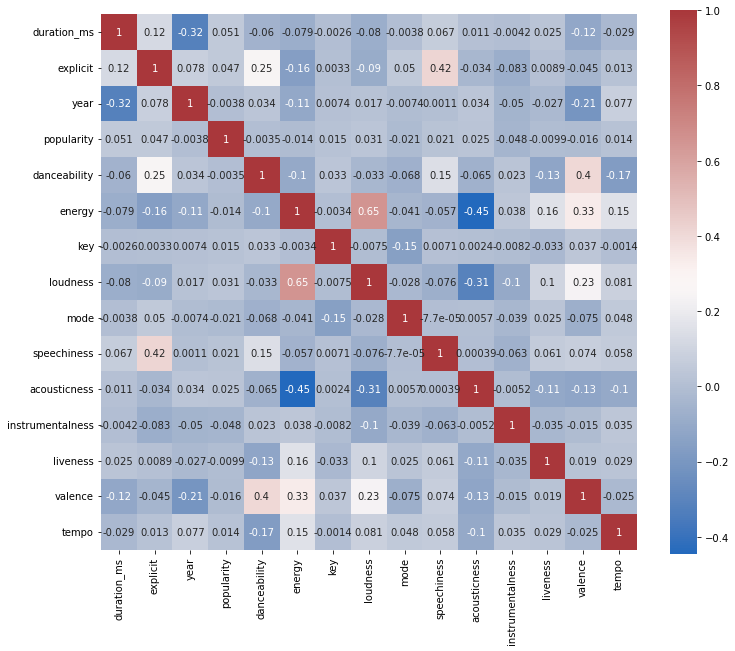

In [57]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='vlag', square=True, annot=True)

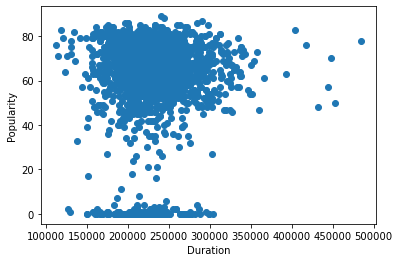

In [58]:
plt.scatter(x=df['duration_ms'], y=df['popularity'])
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show()

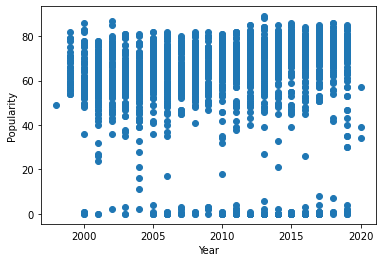

In [59]:
plt.scatter(x=df['year'], y=df['popularity'])
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

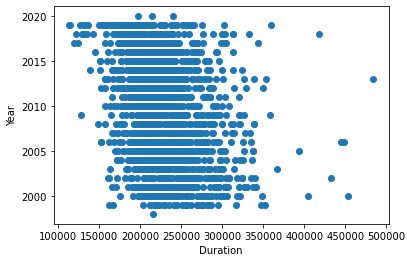

In [60]:
plt.scatter(x=df['duration_ms'], y=df['year'])
plt.xlabel('Duration')
plt.ylabel('Year')
plt.show()

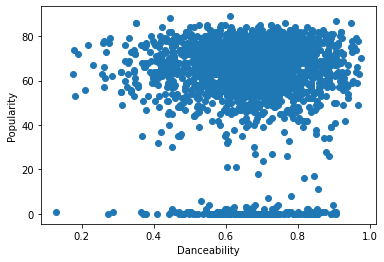

In [61]:
plt.scatter(x=df['danceability'], y=df['popularity'])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

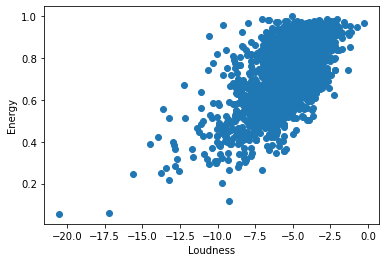

In [62]:
plt.scatter(x=df['loudness'], y=df['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

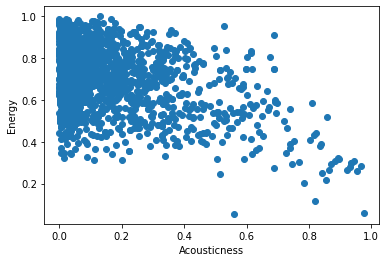

In [63]:
plt.scatter(x=df['acousticness'], y=df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

array([[<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

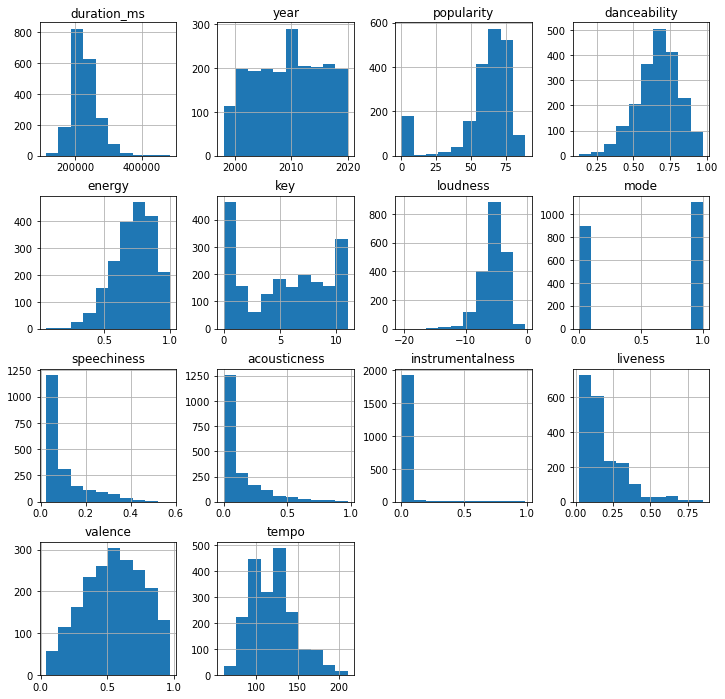

In [64]:
df.hist(figsize=(12,12))

/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


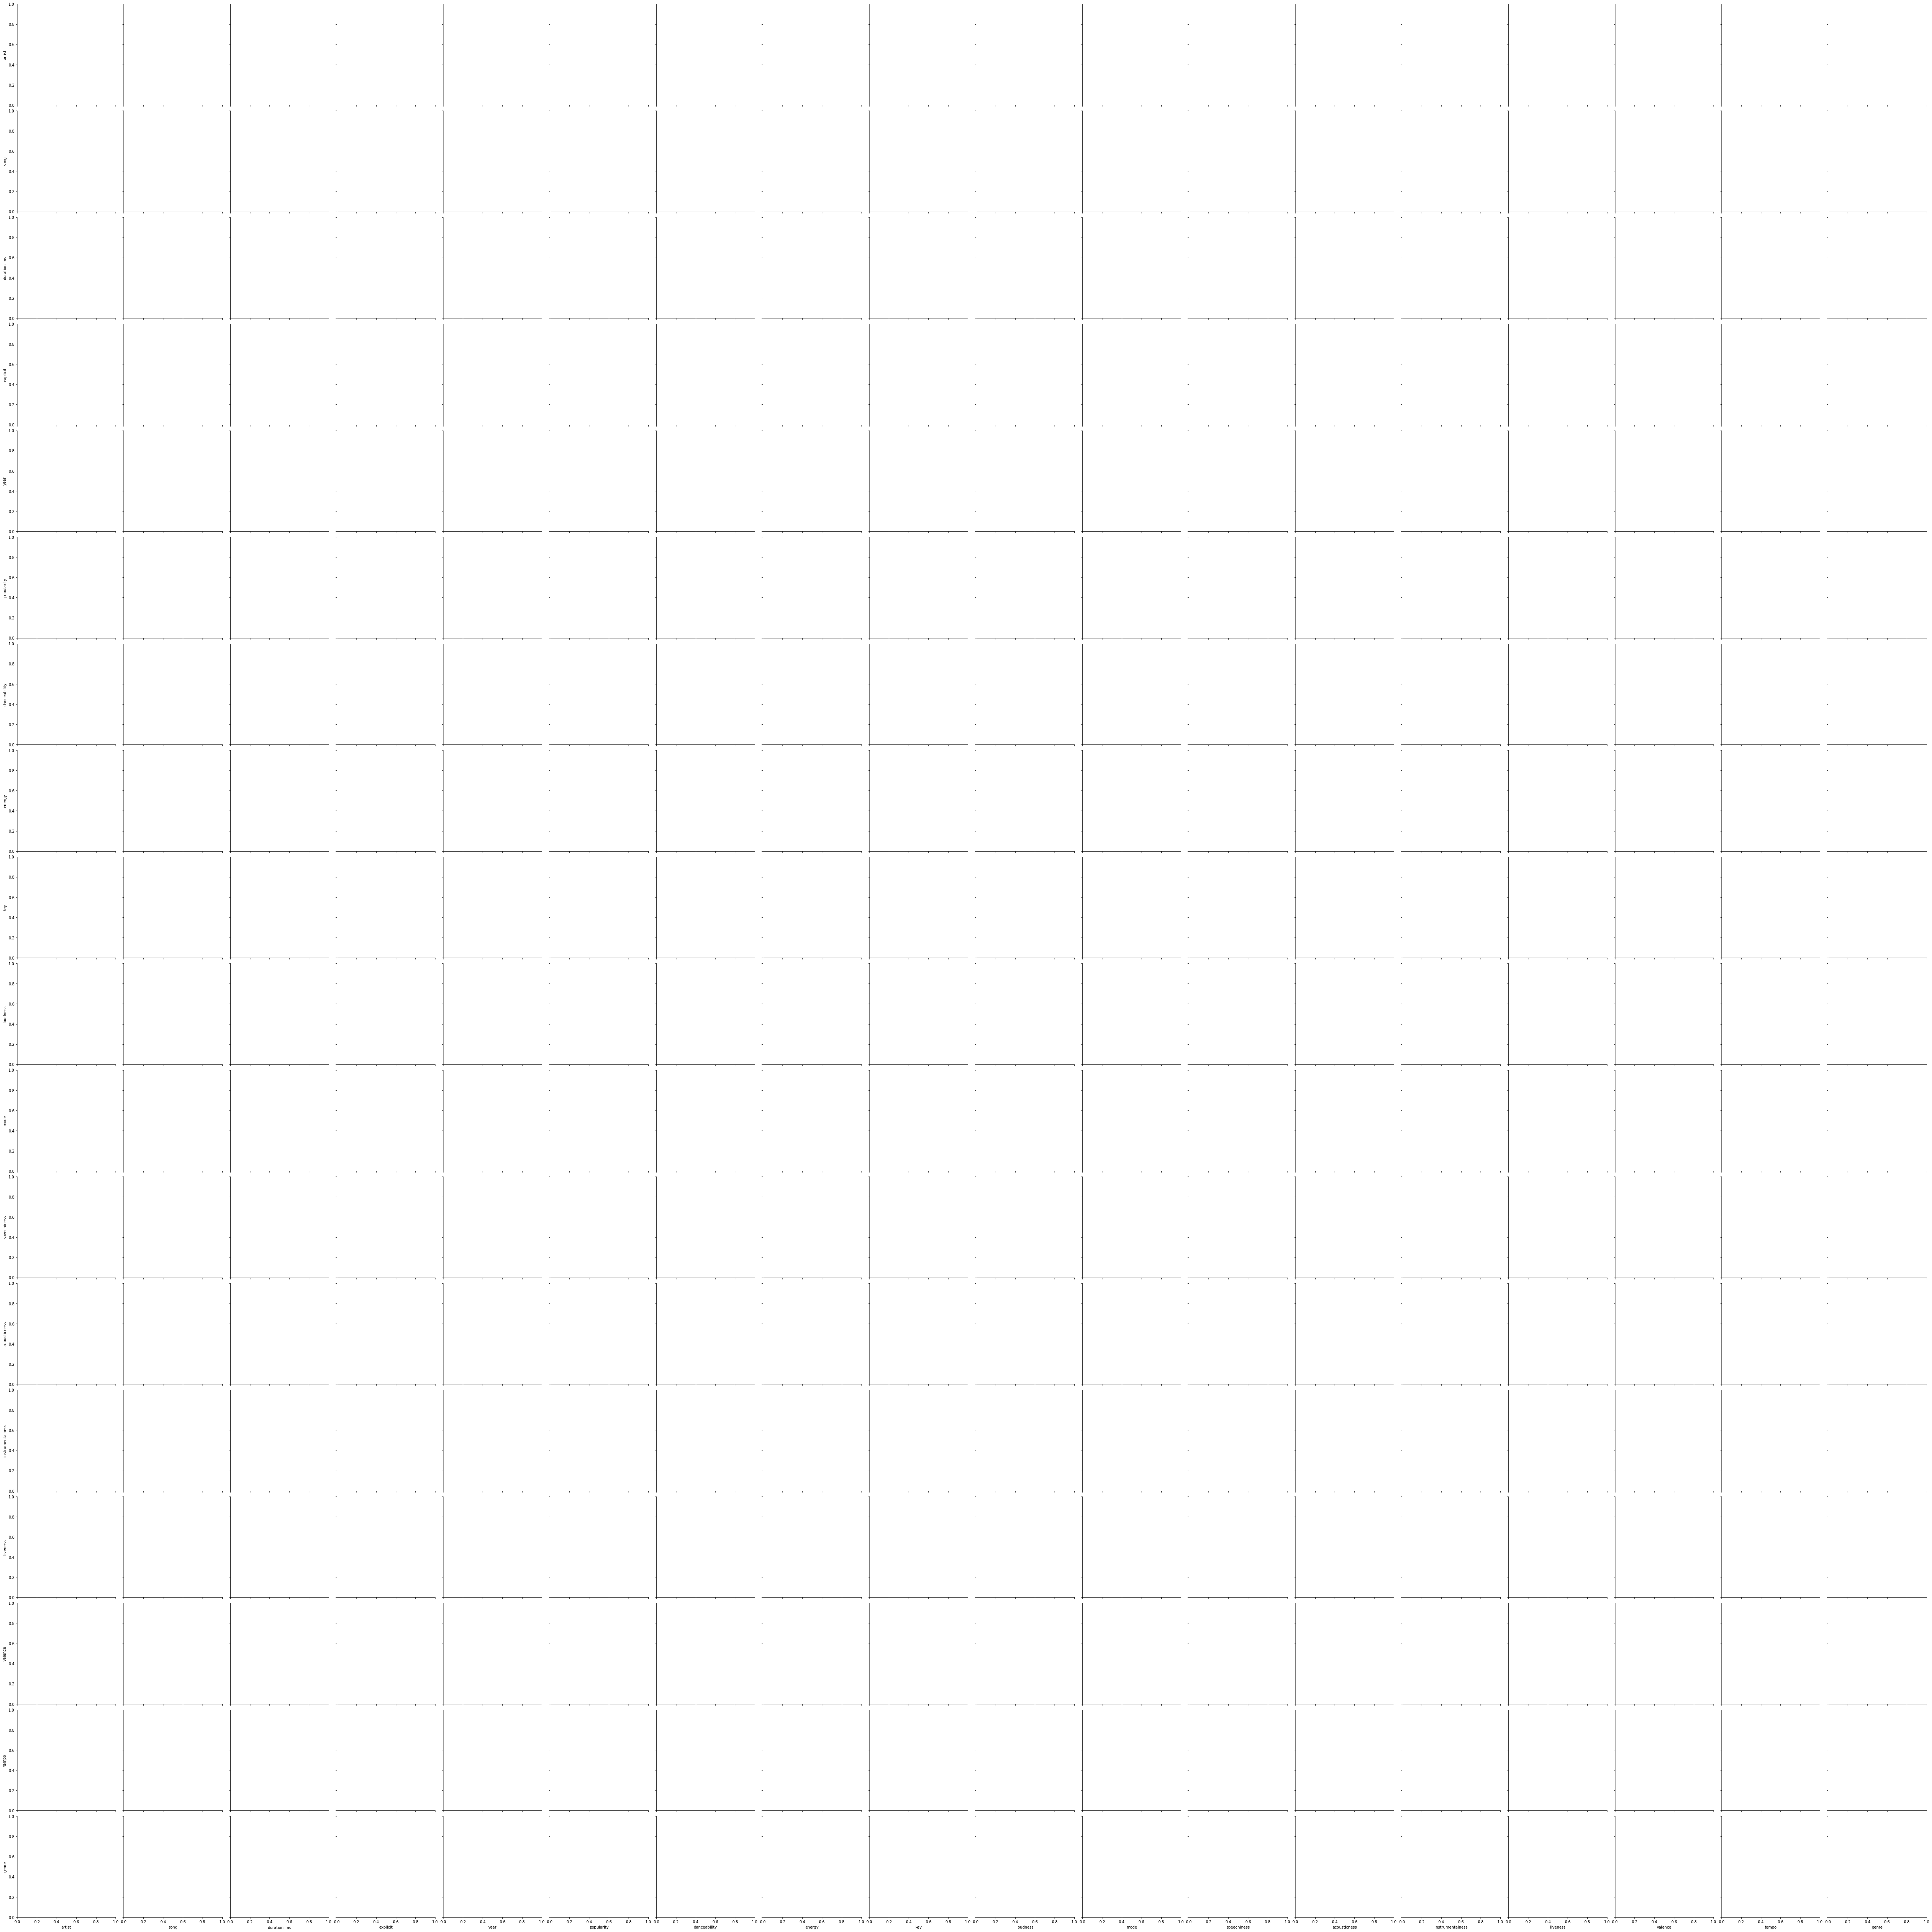

In [69]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=df, vars=list(df.columns), size = 4)

In [22]:
# checking rows that are null based on a specific column 
df[df['mode'].isna()==True] 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


# Method 1: Error Analysis
Model Evaluation: calculate MSE, MAE, RMSE, and MAPE.

In [20]:
#Popularity= loudness + liveness + tempo + key
mse = mean_squared_error(test_act,predicted)
print(mse) #Mean Square Error
math.sqrt(mse) #Root Mean Square Error

NameError: name 'mean_squared_error' is not defined

# Method 2: Determination or Model Validation